


Found 979 images belonging to 3 classes.
Found 171 images belonging to 3 classes.
Epoch 1/10


30/30 [==============================] - 1505s 49s/step - loss: 1.0939 - accuracy: 0.3791 - val_loss: 1.0876 - val_accuracy: 0.3938
Epoch 2/10
30/30 [==============================] - 1601s 54s/step - loss: 1.0944 - accuracy: 0.3897 - val_loss: 1.0963 - val_accuracy: 0.4000
Epoch 3/10
30/30 [==============================] - 1384s 46s/step - loss: 1.0905 - accuracy: 0.3981 - val_loss: 1.0850 - val_accuracy: 0.4062
Epoch 4/10
30/30 [==============================] - 1485s 49s/step - loss: 1.0949 - accuracy: 0.3844 - val_loss: 1.0890 - val_accuracy: 0.3812
Epoch 5/10
30/30 [==============================] - 1181s 39s/step - loss: 1.0920 - accuracy: 0.3918 - val_loss: 1.0929 - val_accuracy: 0.3875
Epoch 6/10
30/30 [==============================] - 1000s 33s/step - loss: 1.0927 - accuracy: 0.3907 - val_loss: 1.0912 - val_accuracy: 0.3875
Epoch 7/10
30/30 [==============================] - 419

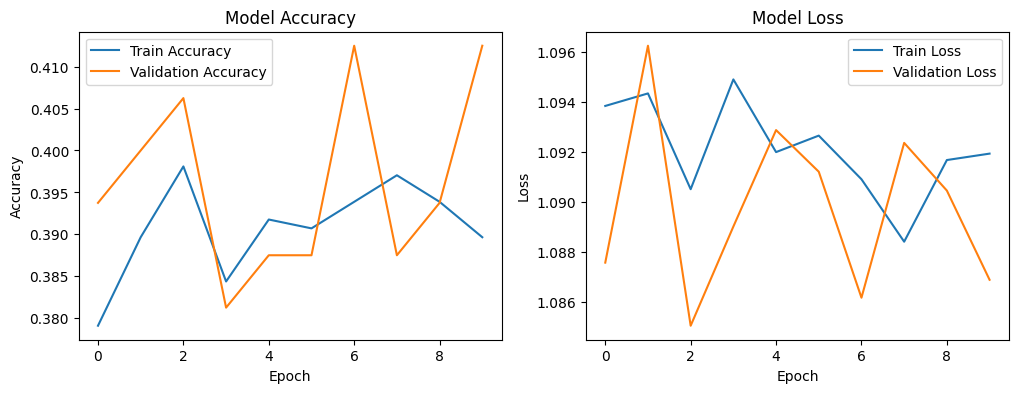

INFO:tensorflow:Assets written to: data3a/vgg16_damage_severity\assets


INFO:tensorflow:Assets written to: data3a/vgg16_damage_severity\assets
C:\Users\saura\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to data3a/vgg16_damage_severity (TensorFlow SavedModel format) and data3a/vgg16_damage_severity.h5 (HDF5 format)
6/6 [==============================] - 14s 2s/step


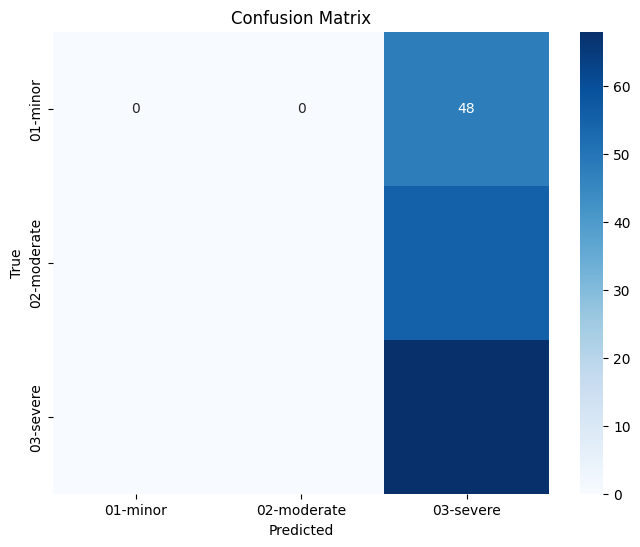

              precision    recall  f1-score   support

    01-minor       0.00      0.00      0.00        48
 02-moderate       0.00      0.00      0.00        55
   03-severe       0.40      1.00      0.57        68

    accuracy                           0.40       171
   macro avg       0.13      0.33      0.19       171
weighted avg       0.16      0.40      0.23       171



C:\Users\saura\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saura\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saura\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

# Constants
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32
EPOCHS = 10
TRAIN_DIR = 'data3a/training'
VAL_DIR = 'data3a/validation'
MODEL_SAVE_PATH = 'data3a/vgg16_damage_severity'  # Directory for saving the model

# Load and build a VGG16-like model
def build_vgg16(input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)):
    model = Sequential()
    
    # VGG16-like layers
    model.add(ZeroPadding2D((1, 1), input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Fully connected layers for classification
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))  # 3 classes: minor, moderate, severe

    return model

# Compile the model
model = build_vgg16()
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

# Data loading
train_generator = train_datagen.flow_from_directory(TRAIN_DIR, target_size=(IMG_WIDTH, IMG_HEIGHT), 
                                                    batch_size=BATCH_SIZE, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(VAL_DIR, target_size=(IMG_WIDTH, IMG_HEIGHT), 
                                                batch_size=BATCH_SIZE, class_mode='categorical')

# Training the model
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // BATCH_SIZE, epochs=EPOCHS,
                    validation_data=val_generator, validation_steps=val_generator.samples // BATCH_SIZE)

# Plotting training metrics
def plot_metrics(history):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_metrics(history)

# Save the model
model.save(MODEL_SAVE_PATH, save_format='tf')
model.save(f"{MODEL_SAVE_PATH}.h5")

print(f"Model saved to {MODEL_SAVE_PATH} (TensorFlow SavedModel format) and {MODEL_SAVE_PATH}.h5 (HDF5 format)")

# Evaluate the model
def evaluate_model(model, val_generator):
    val_generator.reset()
    Y_pred = model.predict(val_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = val_generator.classes
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(),
                yticklabels=val_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification report
    print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))

evaluate_model(model, val_generator)
